In [2]:
import os
import pandas as pd
import numpy as np
import cv2  # conda install -c conda-forge opencv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = False
#plt.style.use('dark_background')
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 15
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["figure.facecolor"] = "white"

# helpers
from utils import get_contours_from_segmasks, get_contour_stats

### Redo segmentation step for 
- 2024_0312_201502_058_trimmed_9sec_ts30-te39_cropped_750-1100-0-600_seg.mp4 - Still a little EXTRA debris BUT OK - DONE
- 2024_0312_200250_054_trimmed_10sec_ts118-te128_cropped_250-1250-0-1100_seg.mp4 - DONE!
- both need a negative click prompt to remove debris

### Further video options:
(new from harddrive)
- 2024_0312_084530_029.MP4
- 2024_0312_091700_034.MP4
- 2024_0312_192713_043.MP4


In [29]:
df = pd.read_csv("./data/videos/moss/moss-corona-dataset.csv")
print("n_clips = ", len(df), "\ntotal_duration (sec) = ", df["duration"].sum())
cidx = 11
print(df.loc[cidx, "save_filename"])
df2 = df.sort_values(by="desc", ignore_index=True)
# continue to visualize all dfs with respective time (FPS)
# group them by description
print(df2.loc[cidx, "save_filename"])


n_clips =  19 
total_duration (sec) =  170
2024_0312_201502_058_trimmed_9sec_ts30-te39_cropped_750-1100-0-600.mp4
2024_0311_153013_020_trimmed_5sec_ts177-te182_cropped_1050-1750-900-2000.mp4


In [4]:
# Video folder
vid_dir = "videos/moss"
vid_path = f"./data/{vid_dir}/"

# Video
vid_filename = df.loc[cidx, "save_filename"]
vid_extension = "." + vid_filename.split(".")[-1]
vid_filename = vid_filename.split(".")[0]
vid_filepath = f"{vid_path}{vid_filename}{vid_extension}"

# Masks
seg_mask_folder_name = "seg_mask_folder"
seg_mask_path = f"{vid_path}/{seg_mask_folder_name}/{vid_filename}_masks"

# Image Frames
frames_filepaths = f"./data/images/{vid_filename}/"
zfill_ = 5

# Results
save_figure_path = f"{vid_path}/results/{vid_filename}"
os.makedirs(save_figure_path, exist_ok=True)

# Params
fps = df.loc[cidx, "fps"]
width = df.loc[cidx, "width"]
height = df.loc[cidx, "height"]
resolution = (height,width)

print(fps, resolution)

60 (1080, 1920)


In [5]:
# restructe this like in another recent notebook! ie Corona-swimming-take-off

# Get Segmentation masks > results of tracking 
mask_filenames = sorted([f for f in os.listdir(seg_mask_path) if f.endswith("png")])
mask_filepaths = [os.path.join(seg_mask_path, fn) for fn in mask_filenames]

# Construct the dataframe
frames = np.linspace(0, len(mask_filepaths), len(mask_filepaths)).astype("int")
df = pd.DataFrame(frames, columns=["frame"])
df["time"] = np.linspace(0, len(df) / fps, len(df))
df["mask_fpath"] = mask_filepaths

num_frames = len(df)
print("num_frames:", num_frames, "; save_figure_path:", save_figure_path, "; fps:", fps, "; resolution:", resolution)

# Adjust resolution depending on frame rate
if fps == 24:
    pixel_per_real_width = .4 # 2.5
    print("UHD, pixel_per_real_width = ", pixel_per_real_width)
elif fps == 60 or fps == 30:
    pixel_per_real_width = .61 # 1.65
    print("FHD, pixel_per_real_width = ", pixel_per_real_width)

# Load in the segmentation masks and find contrours
segmentation_mask_filepaths = df["mask_fpath"].tolist()

#frame_idx = 163 # 128
#contour_list = get_contours_from_segmasks(segmentation_mask_filepaths[:frame_idx])
contour_list = get_contours_from_segmasks(segmentation_mask_filepaths)

# Get contour stats
df_ = get_contour_stats(contour_list) # add xtime but beware of NaN???!!! if area <5

# Concat dfs
df = pd.concat([df, df_], axis=1)
df["img_fpath"] = [f"{frames_filepaths}frame_{str(nth).zfill(zfill_)}.jpg" for nth in range(len(df))]

# Mark frames for subsampling
every_nth_frame = int(fps/2) # subsampling of frames to illustrate
frame_subsample = np.arange(0, num_frames, every_nth_frame)
df["frame_shown"] = 0
df.loc[frame_subsample, "frame_shown"] = 1

# For Visualization of all and subsample
desired_cmap = "brg"
cmap = plt.get_cmap(desired_cmap)
colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(df))]
sub_colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(frame_subsample))]
sub_index = np.arange(0, len(frame_subsample), 1)

# Check df
#df = df[:frame_idx]
num_frames = len(df)
print("num_frames:", num_frames)
#df.head(5)

num_frames: 540 ; save_figure_path: ./data/videos/moss//results/2024_0312_201502_058_trimmed_9sec_ts30-te39_cropped_750-1100-0-600 ; fps: 60 ; resolution: (1080, 1920)
FHD, pixel_per_real_width =  0.61
num_frames: 540


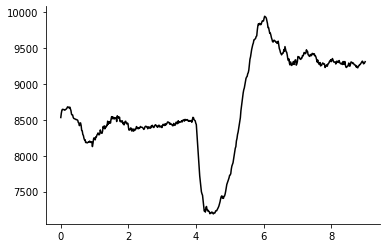

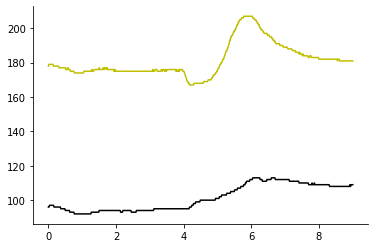

In [6]:
plt.rcParams['figure.facecolor'] = 'white'
plt.figure()
plt.plot(df.time, df.area, "-k")
plt.figure()
plt.plot(df.time, df.centroid_x, "-k")
plt.plot(df.time, df.centroid_y, "-y")

## Loop across all videos once

0
24 (2160, 2880)
num_frames: 360 ; save_figure_path: ./data/videos/moss//results/2024_0312_200031_053_trimmed_15sec_ts74-te89_cropped_250-1250-0-1100 ; fps: 24 ; resolution: (2160, 2880)
UHD, pixel_per_real_width =  0.4
num_frames: 360
1
24 (2160, 2880)
num_frames: 336 ; save_figure_path: ./data/videos/moss//results/2024_0312_200250_054_trimmed_14sec_ts0-te14_cropped_250-1250-0-1100 ; fps: 24 ; resolution: (2160, 2880)
UHD, pixel_per_real_width =  0.4
num_frames: 336
2
24 (2160, 2880)
num_frames: 240 ; save_figure_path: ./data/videos/moss//results/2024_0312_200250_054_trimmed_10sec_ts118-te128_cropped_250-1250-0-1100 ; fps: 24 ; resolution: (2160, 2880)
UHD, pixel_per_real_width =  0.4
num_frames: 240
3
60 (1080, 1920)
num_frames: 600 ; save_figure_path: ./data/videos/moss//results/2024_0312_200610_055_trimmed_10sec_ts32-te42_cropped_200-850-0-600 ; fps: 60 ; resolution: (1080, 1920)
FHD, pixel_per_real_width =  0.61
num_frames: 600
4
60 (1080, 1920)
num_frames: 600 ; save_figure_path

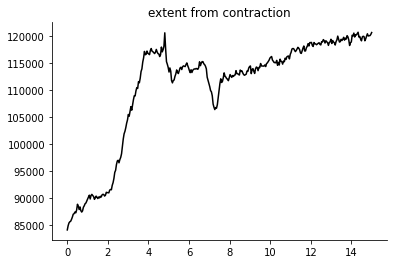

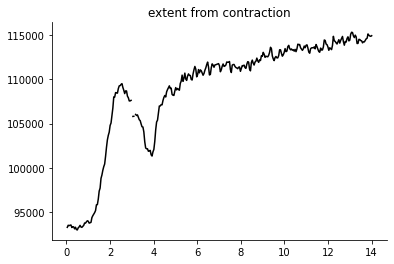

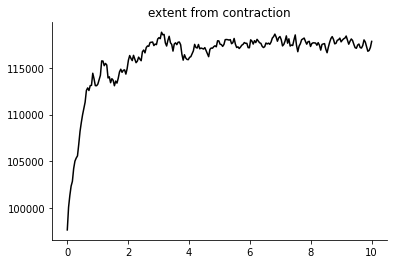

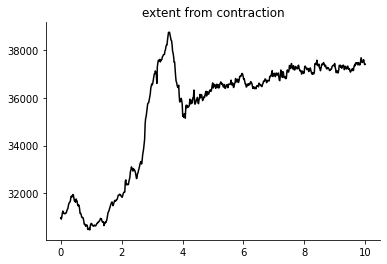

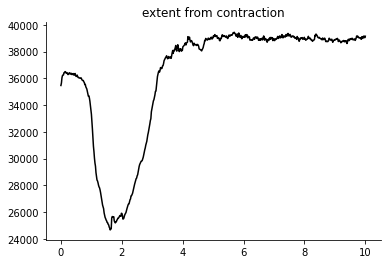

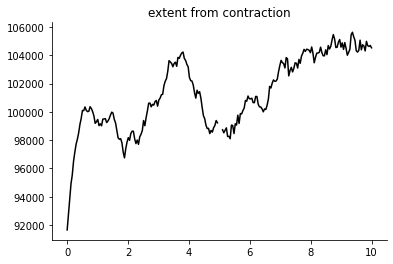

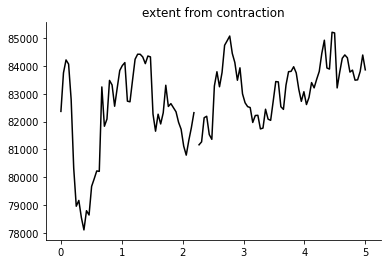

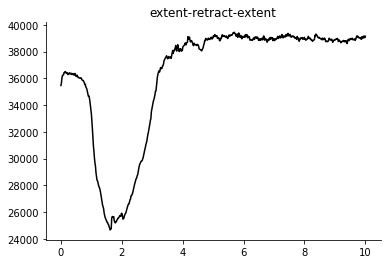

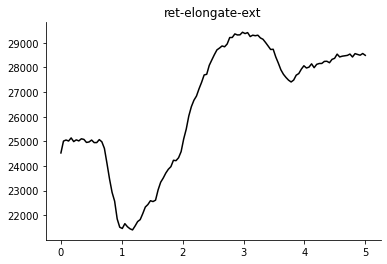

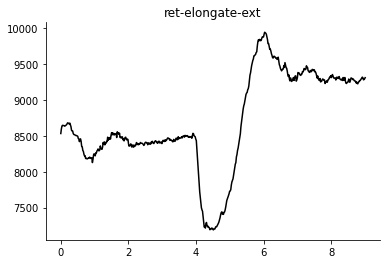

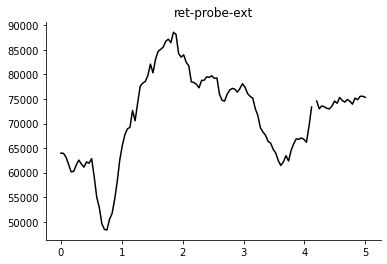

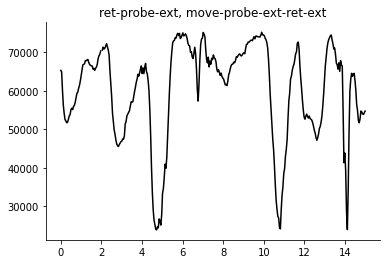

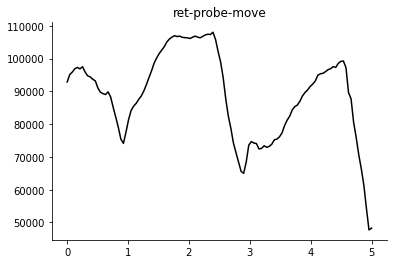

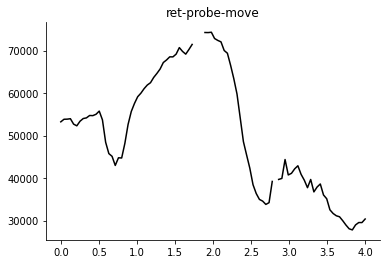

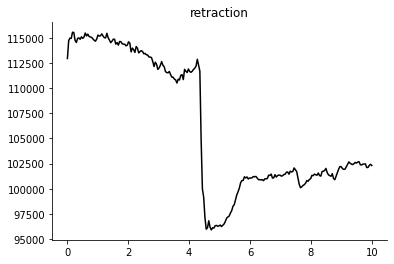

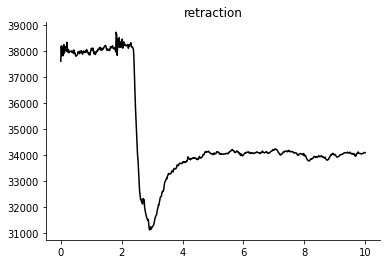

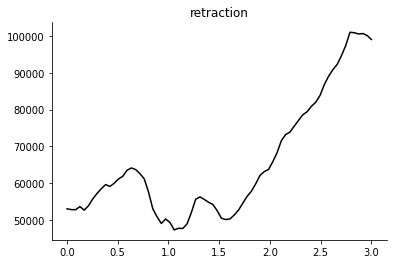

In [33]:
cindices = np.arange(19)  # 12, 13 for default sorting
cindices = np.delete(cindices, np.where(cindices == 8))  # 12
cindices = np.delete(cindices, np.where(cindices == 13))  # 13


for cidx in cindices:
    cidx = int(cidx)
    print(cidx)
    df = pd.read_csv("./data/videos/moss/moss-corona-dataset.csv")
    df = df.sort_values(by="desc", ignore_index=True)
    desc = df.loc[cidx, "desc"]
    
    # Video folder
    vid_dir = "videos/moss"
    vid_path = f"./data/{vid_dir}/"

    # Video
    vid_filename = df.loc[cidx, "save_filename"]
    vid_extension = "." + vid_filename.split(".")[-1]
    vid_filename = vid_filename.split(".")[0]
    vid_filepath = f"{vid_path}{vid_filename}{vid_extension}"

    # Masks
    seg_mask_folder_name = "seg_mask_folder"
    seg_mask_path = f"{vid_path}/{seg_mask_folder_name}/{vid_filename}_masks"

    # Image Frames
    frames_filepaths = f"./data/images/{vid_filename}/"
    zfill_ = 5

    # Results
    save_figure_path = f"{vid_path}/results/{vid_filename}"
    os.makedirs(save_figure_path, exist_ok=True)

    # Params
    fps = df.loc[cidx, "fps"]
    width = df.loc[cidx, "width"]
    height = df.loc[cidx, "height"]
    resolution = (height,width)

    print(fps, resolution)

    # restructe this like in another recent notebook! ie Corona-swimming-take-off

    # Get Segmentation masks > results of tracking 
    mask_filenames = sorted([f for f in os.listdir(seg_mask_path) if f.endswith("png")])
    mask_filepaths = [os.path.join(seg_mask_path, fn) for fn in mask_filenames]

    # Construct the dataframe
    frames = np.linspace(0, len(mask_filepaths), len(mask_filepaths)).astype("int")
    df = pd.DataFrame(frames, columns=["frame"])
    df["time"] = np.linspace(0, len(df) / fps, len(df))
    df["mask_fpath"] = mask_filepaths

    num_frames = len(df)
    print("num_frames:", num_frames, "; save_figure_path:", save_figure_path, "; fps:", fps, "; resolution:", resolution)

    # Adjust resolution depending on frame rate
    if fps == 24:
        pixel_per_real_width = .4 # 2.5
        print("UHD, pixel_per_real_width = ", pixel_per_real_width)
    elif fps == 60 or fps == 30:
        pixel_per_real_width = .61 # 1.65
        print("FHD, pixel_per_real_width = ", pixel_per_real_width)

    # Load in the segmentation masks and find contrours
    segmentation_mask_filepaths = df["mask_fpath"].tolist()

    #frame_idx = 163 # 128
    #contour_list = get_contours_from_segmasks(segmentation_mask_filepaths[:frame_idx])
    contour_list = get_contours_from_segmasks(segmentation_mask_filepaths)

    # Get contour stats
    df_ = get_contour_stats(contour_list) # add xtime but beware of NaN???!!! if area <5

    # Concat dfs
    df = pd.concat([df, df_], axis=1)
    df["img_fpath"] = [f"{frames_filepaths}frame_{str(nth).zfill(zfill_)}.jpg" for nth in range(len(df))]

    # Mark frames for subsampling
    every_nth_frame = int(fps/2) # subsampling of frames to illustrate
    frame_subsample = np.arange(0, num_frames, every_nth_frame)
    df["frame_shown"] = 0
    df.loc[frame_subsample, "frame_shown"] = 1

    # For Visualization of all and subsample
    desired_cmap = "brg"
    cmap = plt.get_cmap(desired_cmap)
    colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(df))]
    sub_colors = [cmap(i)[:3] for i in np.linspace(0, 1, len(frame_subsample))]
    sub_index = np.arange(0, len(frame_subsample), 1)

    # Check df
    #df = df[:frame_idx]
    num_frames = len(df)
    print("num_frames:", num_frames)
    #df.head(5)

    area = df["area"].to_numpy()
    area[area<=1000] = np.nan
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.figure()
    plt.plot(df.time, area, "-k")
    plt.title(desc)#plt.figure()
    #plt.plot(df.time, df.centroid_x, "-k")
    #plt.plot(df.time, df.centroid_y, "-y")

In [21]:
print(np.sum(np.isnan(area)))
area2 = area[~np.isnan(area)]
#area2 = np.delete(area, np.where(area == np.NaN)) 
print(np.unique(area2))

360
[23819.5 23899.5 24008.5 24092.5 24305.  24367.5 24625.  25066.  25214.
 26226.  26367.5 26674.  26877.5 27345.  27712.5 28700.5 28972.5 29095.5
 29226.  31538.5 32866.5 33328.  33540.  34160.5 34580.5 35044.  35640.
 37349.  38474.  39398.  39742.  39844.5 40022.  40471.  40920.  41282.
 42594.5 42993.5 43819.5 44660.5 44818.5 45515.5 45683.5 46030.  46154.5
 46421.  46766.  46912.  47126.5 47172.5 47420.  47420.5 47467.  47476.5
 47763.  47890.5 48123.5 48294.5 48364.5 48628.  48733.5 49018.  49243.
 49768.  49780.5 50146.5 50727.  50794.5 50852.5 51384.5 51678.  51686.5
 51760.  51788.5 51806.5 52016.  52045.5 52144.5 52265.5 52389.  52499.
 52585.  52610.5 52674.  52741.  52796.5 52800.  52898.5 53165.  53349.5
 53364.  53397.5 53424.  53461.5 53485.5 53812.5 53844.  53920.5 53939.
 53951.5 53966.5 54083.5 54126.5 54309.  54455.  54480.  54658.5 54715.5
 54725.  54820.  54902.5 55042.  55095.  55118.5 55131.  55244.  55442.5
 55905.  55939.  55954.5 56209.  56225.5 56407.5 5699

24


Text(0, 0.5, 'Power')

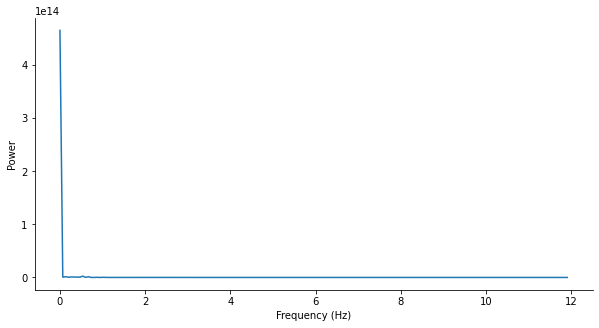

In [20]:
sampling_rate = fps  # Hz
print(sampling_rate)
fft_result = np.fft.fft(area2)  # HAVE TO SUBTRACT THE MEAN!!!

freqs = np.fft.fftfreq(len(area2), d=1/sampling_rate)
power_spectrum = np.abs(fft_result)**2

plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(area2)//2], power_spectrum[:len(area2)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [ ]:
rot_imgs = []
rot_masks = []
rot_contours = []

for nth, row in df.iterrows():
    # Img
    cimg = cv2.cvtColor(cv2.imread(row["img_fpath"], 1), cv2.COLOR_BGR2RGB)
    # Mask
    cmask = cv2.cvtColor(cv2.imread(row["mask_fpath"], 1), cv2.COLOR_BGR2GRAY)
    
    # Rotatation parameters
    h, w = cimg.shape[:2]
    center = (w/2, h/2)
    angle = row["orientation"]  # fitted ellipse angle
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)

    # Rotate img, mask, and get contour
    rot_imgs.append(cv2.warpAffine(src=cimg, M=rotate_matrix, dsize=(w, h)))
    rot_masks.append(cv2.warpAffine(src=cmask, M=rotate_matrix, dsize=(w, h)))

In [ ]:
#plt.rcParams['figure.facecolor'] = 'white'

nth = 31
cimg = cv2.cvtColor(cv2.imread(df.loc[nth,"img_fpath"], 1), cv2.COLOR_BGR2RGB)
background = np.ones_like(cimg) * 255
cmask = cv2.cvtColor(cv2.imread(df.loc[nth,"mask_fpath"], 1), cv2.COLOR_BGR2GRAY)

masked_image = cv2.bitwise_and(cimg, cimg, mask=cmask)
masked_image = np.where(masked_image != 0, masked_image, background)

# edeges
edges = cv2.Canny(cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY), 150, 250)

plt.figure()
#plt.imshow(cimg)
#plt.imshow(masked_image[100:400, 550:850])
plt.imshow(edges[100:400, 550:850])

In [ ]:
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 150, 250)

plt.imshow(edges)
print(edges.shape)

In [ ]:
# slight dialation and hole filling would do masks good...

In [ ]:
SAVE_VIDEO = True

if SAVE_VIDEO:
    video = cv2.VideoWriter(f"{save_figure_path}/{vid_filename}_frames_text.mp4", fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=fps, frameSize=(w, h), isColor=True)
    for nth, row in df.iterrows():
        
        frame = cv2.imread(row["img_fpath"], 1)
        background = np.ones_like(frame) * 255

        cmask = cv2.cvtColor(cv2.imread(row["mask_fpath"], 1), cv2.COLOR_BGR2GRAY)
        masked_frame = cv2.bitwise_and(frame, frame, mask=cmask)
        masked_frame = np.where(masked_frame != 0, masked_frame, background)
        
        cv2.putText(masked_frame, f"frame{str(nth).zfill(zfill_)}", (600,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
        
        video.write(masked_frame)

    cv2.destroyAllWindows()
    video.release()

### masked video

In [ ]:
print(f"{save_figure_path}/{vid_filename}_frames_text.mp4")